In [189]:
# XGBoost
import numpy as np
from sklearn import svm
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import roc_auc_score,confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import xgboost

In [3]:
# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

/Users/hongee/Envs/cs168_project/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [116]:
data1 = np.load("./sample_data.npy")
data2 = np.load("./sample_data_2.npy")

In [121]:
data = np.append(data1, data2, axis=0)

In [231]:
X = data[:,1:]
y = [ 1 if i > 3 else 0 for i in data[:,0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("Num Malignant In Total: %d, %f" % (np.sum(y), np.sum(y)/len(y)))
print("Num Malignant In Train: %d, %f" % (np.sum(y_train), np.sum(y_train)/len(y_train)))
print("Num Malignant In Test: %d, %f" % (np.sum(y_test), np.sum(y_test)/len(y_test)))

Num Malignant In Total: 310, 0.284404
Num Malignant In Train: 267, 0.288337
Num Malignant In Test: 43, 0.262195


In [148]:
X_train.shape

(926, 1033)

In [233]:
xgbclassifier = xgboost.XGBClassifier(verbose=True)
xgbclassifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbose=True)

In [234]:
y_score = xgbclassifier.predict_proba(X_test)[:,1]
y_pred = xgbclassifier.predict(X_test)
evaluate(y_test, y_pred, y_score)

F1-Score: 0.518519
ROC-Score: 0.824620
Confusion Matrix:

 Predicted    0   1  All
True                   
0          104  17  121
1           22  21   43
All        126  38  164


/Users/hongee/Envs/cs168_project/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [235]:
#classifier = svm.SVC(kernel='linear', C=0.1, probability=True)
#classifier = svm.LinearSVC(dual=True, C=0.1)
classifier = linear_model.SGDClassifier(class_weight="balanced", max_iter=25)
#classifier = ensemble.RandomForestClassifier(n_estimators=100, max_depth=3)
classifier.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=25, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [236]:
scoring_op = getattr(classifier, "predict_proba", None)
if callable(scoring_op):
    y_score = classifier.predict_proba(X_test)[:,1]
else:
    y_score = classifier.decision_function(X_test)

y_pred = classifier.predict(X_test)
evaluate(y_test, y_pred, y_score)

F1-Score: 0.592593
ROC-Score: 0.799154
Confusion Matrix:

 Predicted   0   1  All
True                  
0          88  33  121
1          11  32   43
All        99  65  164


Confusion Matrix:
```
TP | FP
-------
FN | TN
```

In [207]:
def evaluate(y_test, y_pred, y_score):
    print("F1-Score: %f" % f1_score(y_test, y_pred))
    print("ROC-Score: %f" % roc_auc_score(y_test,y_score))
    print("Confusion Matrix:\n\n",pd.crosstab(pd.Series(y_test), pd.Series(y_pred), rownames=['True'], colnames=['Predicted'],margins=True))

## Show TP/FN

FN: -121


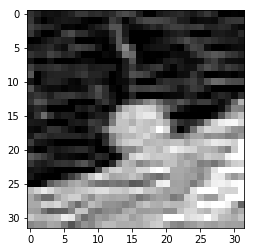

FN: -73


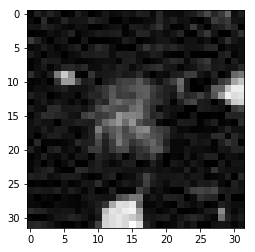

FN: -113


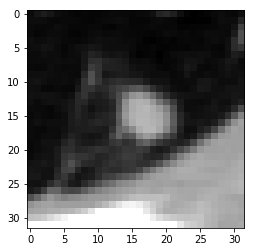

FN: -60


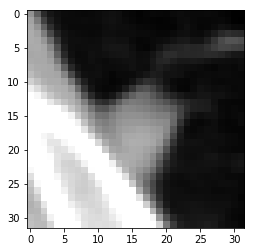

FN: -103


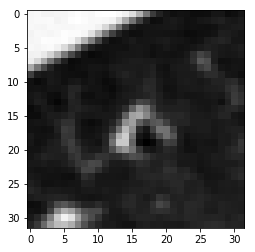

FN: -72


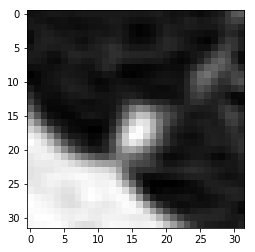

FN: -111


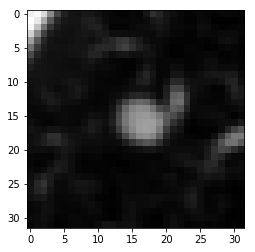

FN: -91


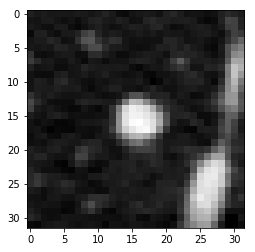

FN: -55


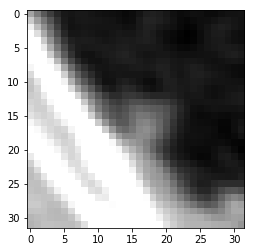

FN: -83


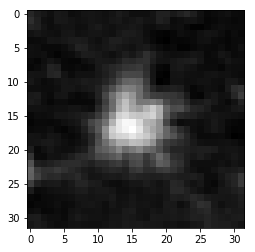

FN: -44


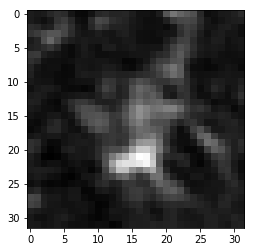

FN: -92


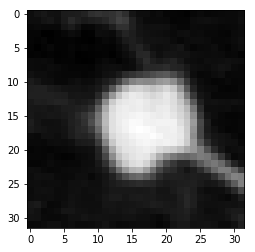

FN: -79


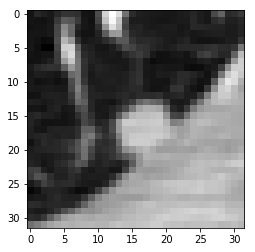

FN: -13


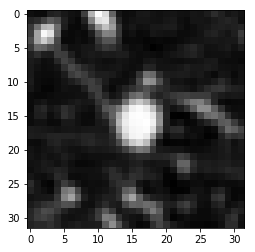

TP: 125.837721


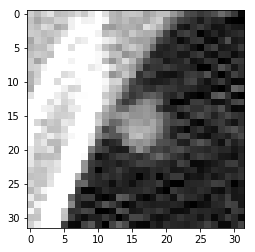

TP: 14.654951


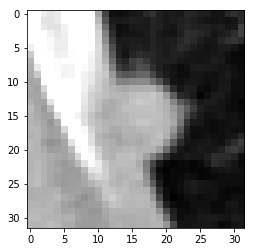

FN: -91


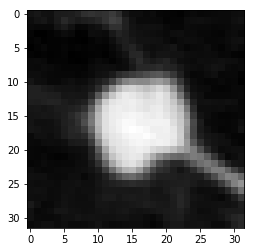

FN: -17


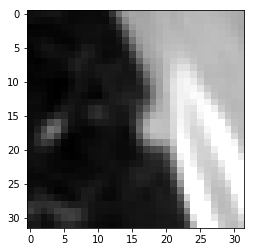

TP: 16.099294


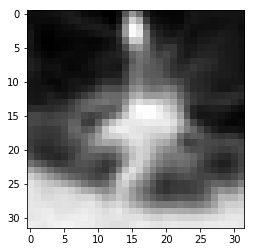

TP: 35.205252


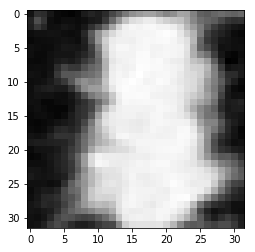

FN: -75


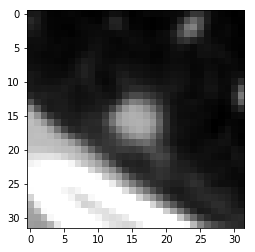

FN: -30


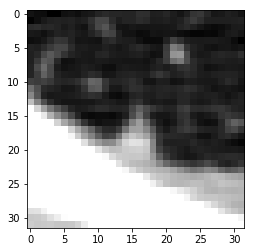

TP: 103.971979


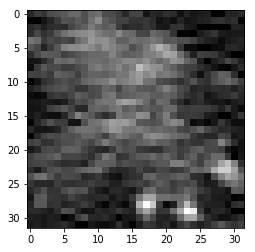

TP: 62.890308


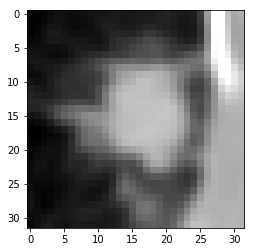

TP: 53.353576


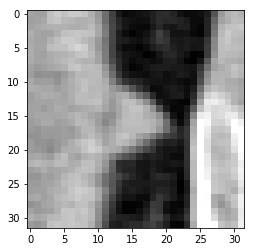

FN: -115


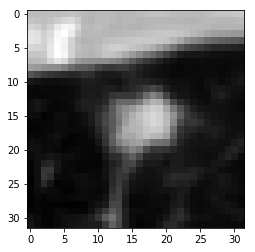

FN: -97


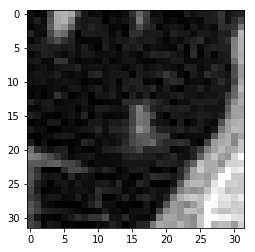

TP: 133.226962


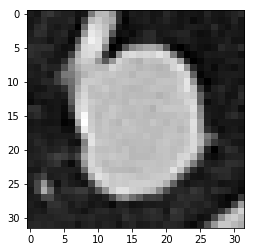

FN: -306


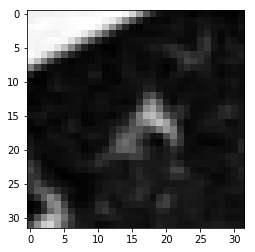

FN: -98


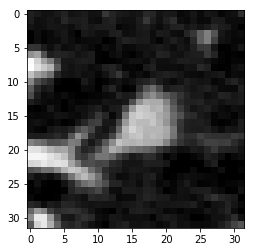

TP: 34.489828


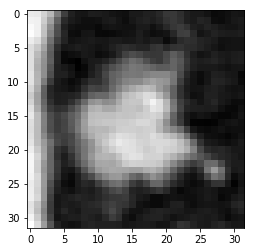

FN: -54


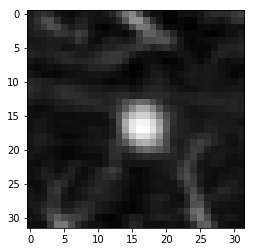

FN: -61


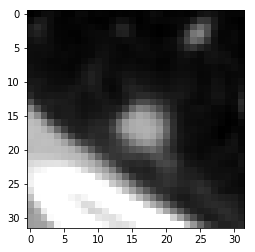

FN: -30


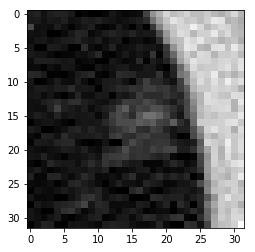

TP: 2.501649


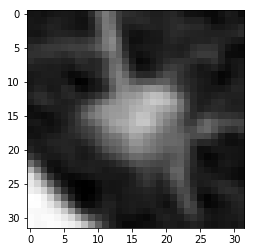

FN: -54


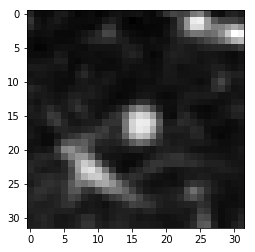

TP: 57.021686


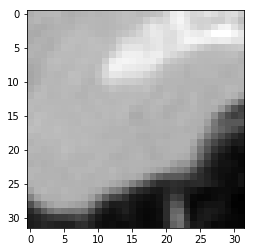

TP: 0.269991


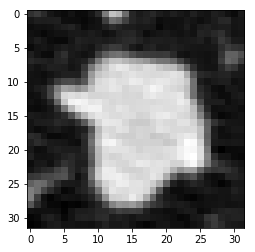

FN: -41


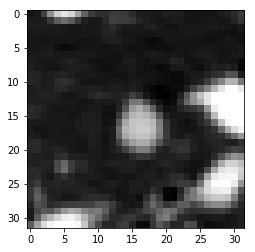

FN: -30


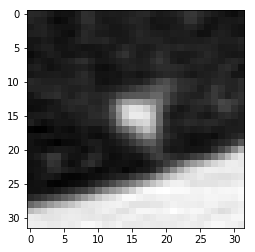

FN: -166


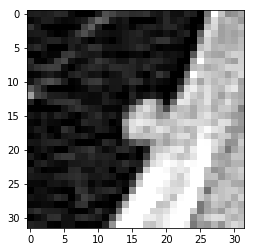

FN: -16


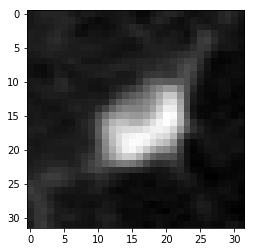

FN: -93


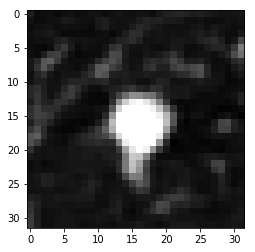

FN: -76


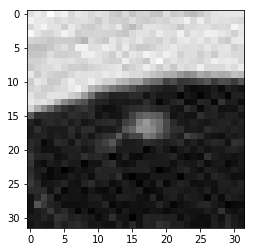

FN: -89


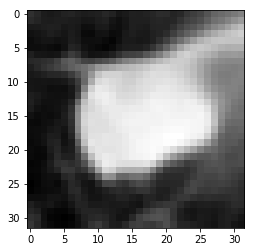

FN: -47


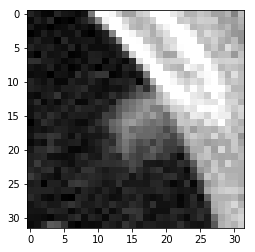

FN: -78


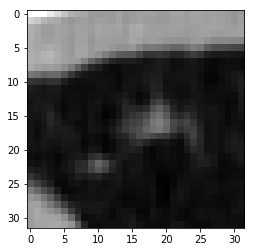

FN: -63


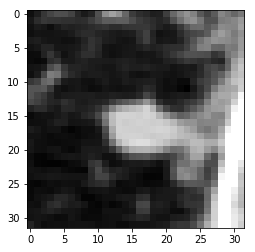

FN: -27


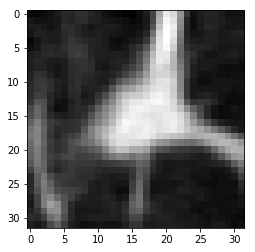

FN: -87


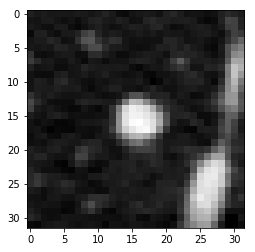

FN: -7


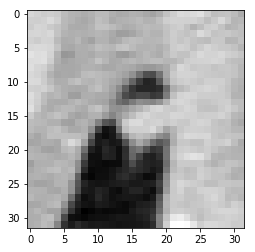

FN: -151


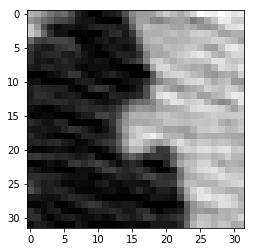

FN: -64


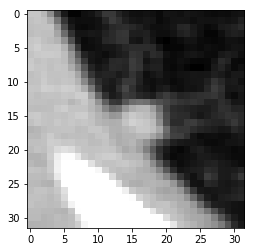

TP: 48.821193


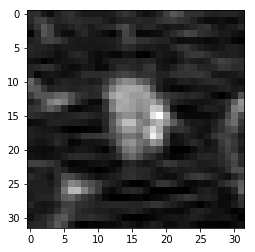

TP: 52.391082


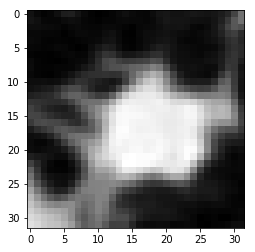

TP: 149.594360


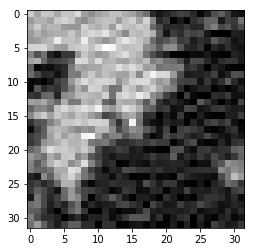

FN: -41


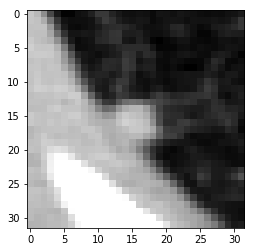

FN: -83


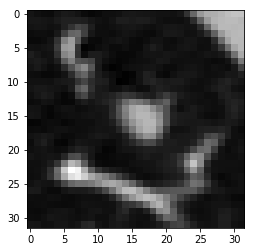

FN: -96


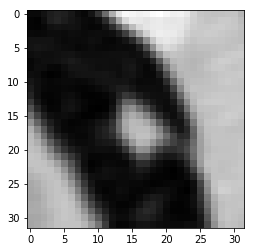

FN: -84


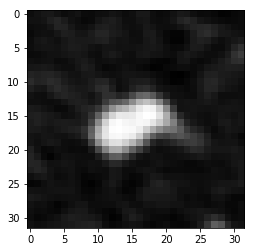

FN: -108


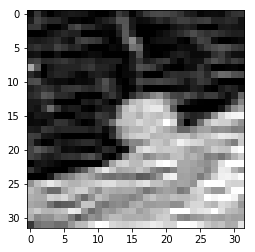

FN: -42


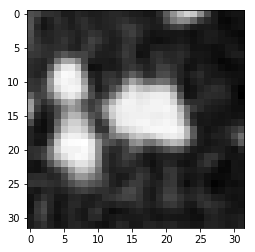

TP: 76.477774


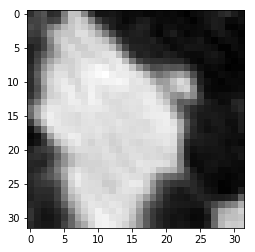

FN: -27


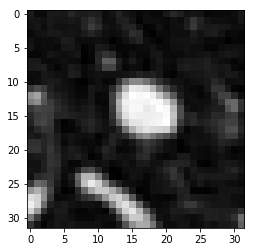

FN: -42


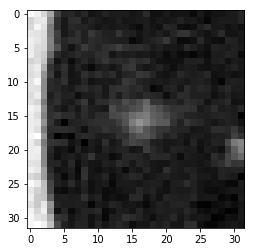

TP: 33.255547


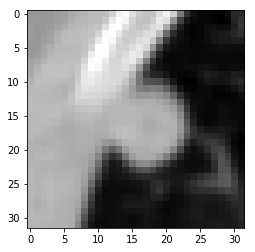

TP: 2.168548


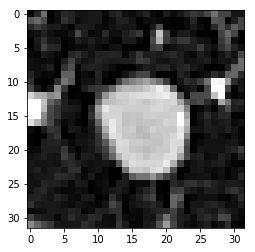

FN: -47


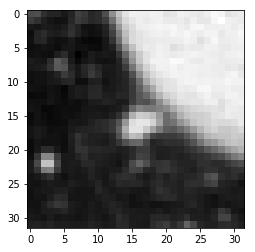

TP: 11.227942


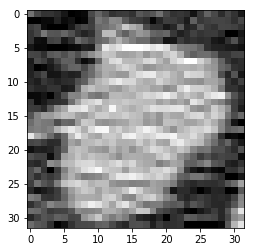

TP: 36.069465


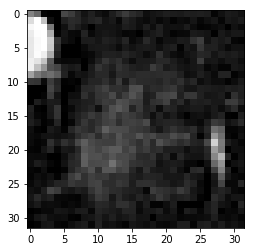

TP: 86.578298


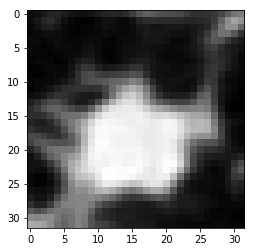

FN: -77


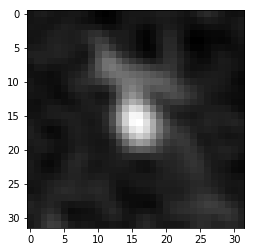

FN: -80


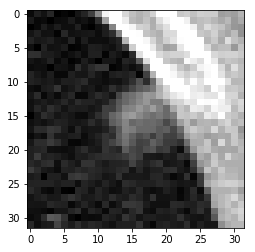

FN: -120


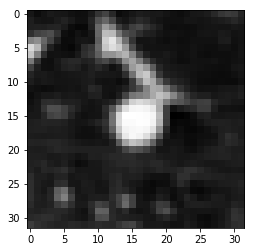

FN: -64


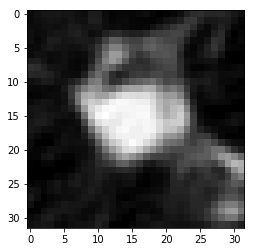

FN: -6


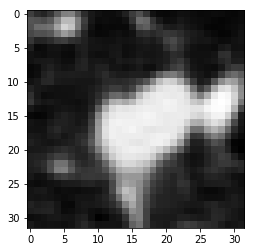

FN: -27


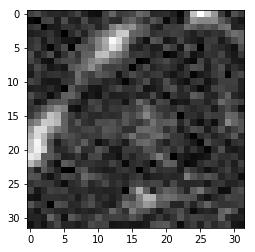

FN: -100


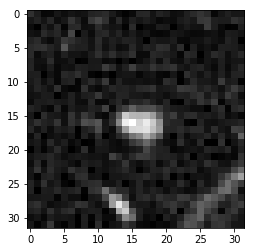

FN: -69


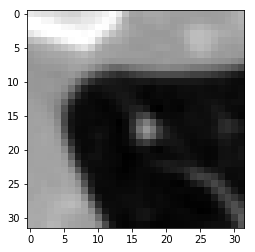

TP: 29.344022


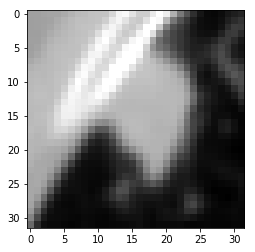

FN: -13


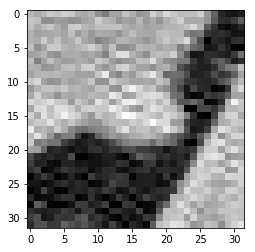

TP: 66.372199


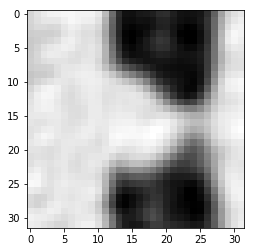

FN: -18


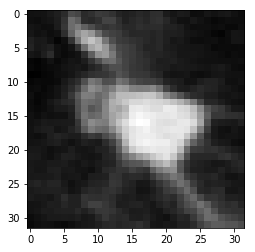

FN: -76


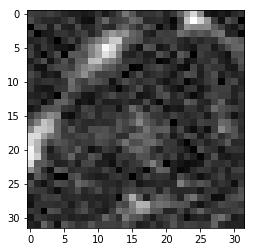

FN: -19


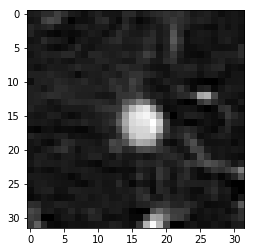

FN: -120


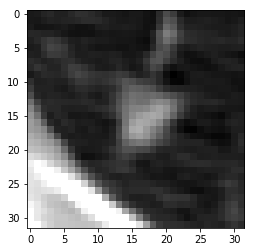

FN: -73


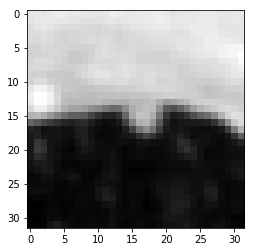

FN: -34


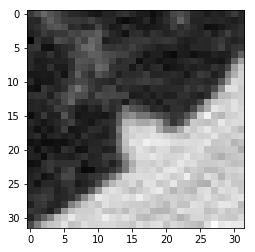

FN: -50


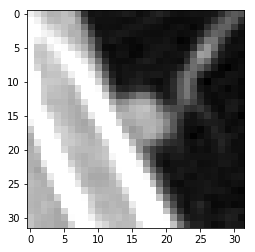

TP: 76.382929


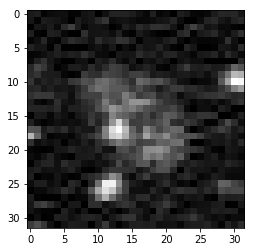

FN: -68


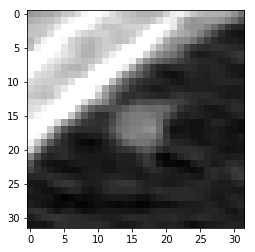

FN: -88


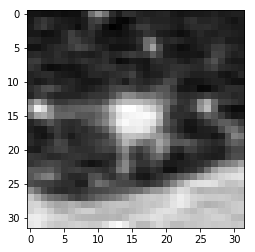

TP: 3.730524


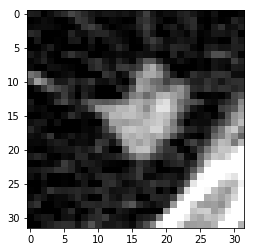

TP: 58.628805


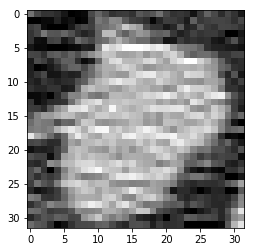

TP: 27.100935


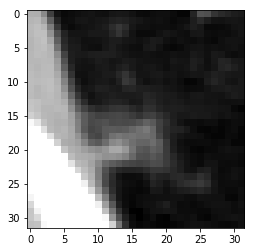

FN: -78


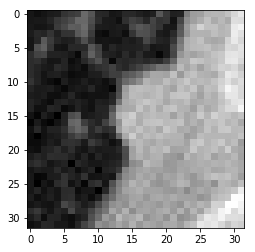

FN: -7


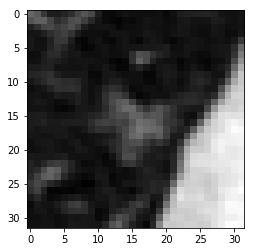

FN: -41


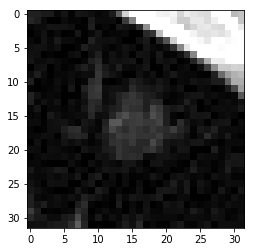

FN: -72


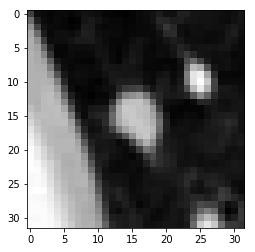

TP: 29.382865


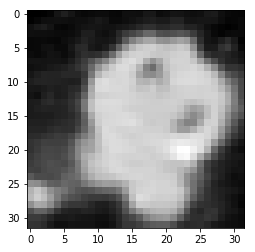

TP: 10.033117


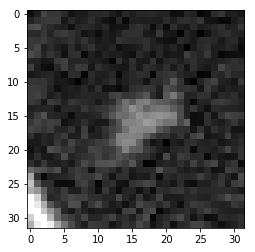

FN: -83


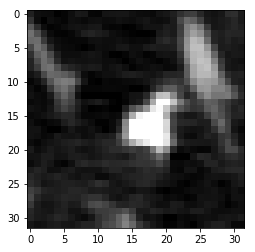

TP: 75.336725


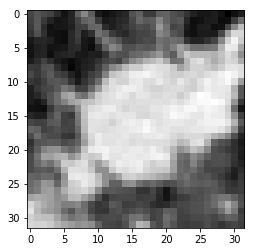

FN: -103


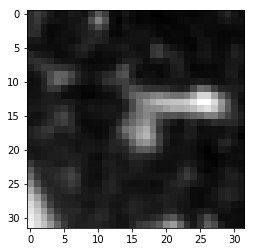

FN: -15


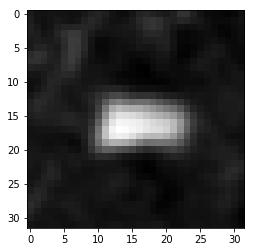

TP: 33.608210


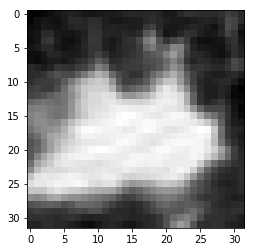

TP: 4.285383


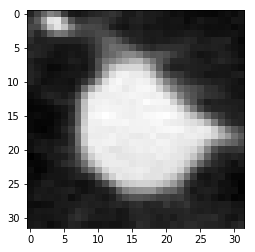

FN: -93


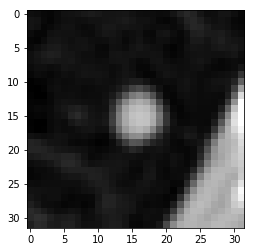

TP: 177.649871


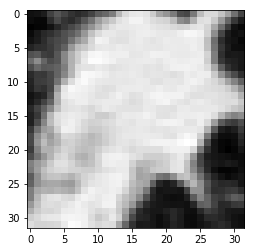

In [188]:
for i,pred in enumerate(y_pred):
    if pred == 1 and y_test[i] == 1:
        print("TP: %f" % y_score[i])
        img = X_test[i][9:].reshape((32,32))
        plt.imshow(img, cmap='gray')
        plt.show()
    if pred == 0 and y_test[i] == 1:
        print("FN: %d" % y_score[i])
        img = X_test[i][9:].reshape((32,32))
        plt.imshow(img, cmap='gray')
        plt.show()

